In [14]:
import pandas as pd
import seaborn as sns
from math import log10

df = pd.read_csv('./Scorecard.txt', sep='\t')

In [3]:
df.columns

Index(['UNITID', 'OPEID', 'NAME', 'CITY', 'STATE', 'ZIP', 'MAINCAMPUS',
       'HIGHESTDEG', 'TYPE', 'LOCALE', 'LOCALE 2', 'LATITUDE', 'LONGITUDE',
       'CARNEGIE', 'CARNEGIE.ABBREV', 'UGPROFILE', 'UGPROFILE.ABBREV',
       'SIZE.SETTING', 'TWO.YR.FOUR.YR', 'HIST.BLACK', 'PRED.BLACK',
       'ALASKA.HAWAII', 'TRIBAL', 'AANAPII', 'HISPANIC', 'NATIVE.AM',
       'MENONLY', 'WOMENONLY', 'UGDS', 'EXP.PER.STD', 'TUITFTE',
       'LOG(TUITION)', 'MEDIAN.DEBT', 'PCTPELL', 'AVE.AGE', 'FEMALE.PCT',
       'FIRST_GEN', 'FAMILY.INC', 'MED.INC.AFT6'],
      dtype='object')

<AxesSubplot:xlabel='EXP.PER.STD', ylabel='Count'>

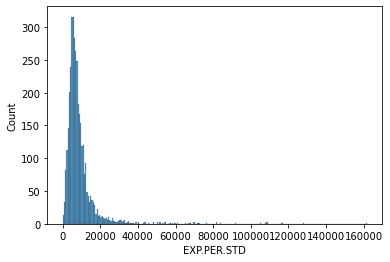

In [5]:
sns.histplot(data=df, x='EXP.PER.STD')

The distribution is skewed to the right. It is unimodal with ouliers on the far end.

In [12]:
s = df['EXP.PER.STD'].std()
y = df['EXP.PER.STD'].mean()
df['EXP.Z'] = (df['EXP.PER.STD'] - y) / s

In [13]:
df.iloc[0]

UNITID                                                         100654
OPEID                                                          100200
NAME                                         Alabama A & M University
CITY                                                           Normal
STATE                                                              AL
ZIP                                                             35762
MAINCAMPUS                                                Main campus
HIGHESTDEG                                            Graduate degree
TYPE                                                           Public
LOCALE              City: Midsize (population of at least 100,000 ...
LOCALE 2                                                         City
LATITUDE                                                    34.783368
LONGITUDE                                                  -86.568502
CARNEGIE            Master's Colleges & Universities: Larger Programs
CARNEGIE.ABBREV     

For Alabama A&M University, the expenditure per full time student is -0.4SD than the mean. It is not unsual.

In [25]:
def transform(x):
    return log10(x+(1/6))


df = pd.read_csv('./Scorecard.txt', sep='\t')

s = df['EXP.PER.STD'].std()
y = df['EXP.PER.STD'].mean()
df['EXP.Z'] = (df['EXP.PER.STD'] - y) / s


df['EXP.LOG'] = df['EXP.PER.STD'].apply(transform)
y_log = df['EXP.LOG'].mean()
st_log = df['EXP.LOG'].std()

df['EXP.LOG.Z'] = (df['EXP.LOG']-y_log)/st_log

In [26]:
df.iloc[0]

UNITID                                                         100654
OPEID                                                          100200
NAME                                         Alabama A & M University
CITY                                                           Normal
STATE                                                              AL
ZIP                                                             35762
MAINCAMPUS                                                Main campus
HIGHESTDEG                                            Graduate degree
TYPE                                                           Public
LOCALE              City: Midsize (population of at least 100,000 ...
LOCALE 2                                                         City
LATITUDE                                                    34.783368
LONGITUDE                                                  -86.568502
CARNEGIE            Master's Colleges & Universities: Larger Programs
CARNEGIE.ABBREV     

<AxesSubplot:xlabel='EXP.LOG', ylabel='Count'>

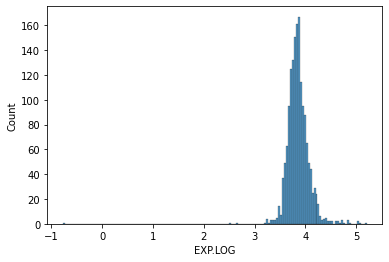

In [29]:
sns.histplot(data=df[df.TYPE == df.iloc[0].TYPE], x='EXP.LOG')

<AxesSubplot:xlabel='EXP.PER.STD', ylabel='Count'>

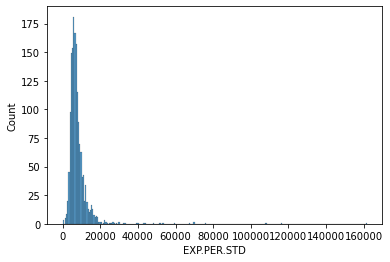

In [30]:
sns.histplot(data=df[df.TYPE == df.iloc[0].TYPE], x='EXP.PER.STD')

In [38]:
df[df.TYPE == df.iloc[0].TYPE].iloc[1]

UNITID                                                         100663
OPEID                                                          105200
NAME                              University of Alabama at Birmingham
CITY                                                       Birmingham
STATE                                                              AL
ZIP                                                        35294-0110
MAINCAMPUS                                                Main campus
HIGHESTDEG                                            Graduate degree
TYPE                                                           Public
LOCALE              City: Midsize (population of at least 100,000 ...
LOCALE 2                                                         City
LATITUDE                                                    33.505697
LONGITUDE                                                  -86.799345
CARNEGIE            Doctoral Universities: Very High Research Acti...
CARNEGIE.ABBREV     

In [39]:
df2 = df[df.TYPE == df.iloc[0].TYPE]

In [40]:
y2 = df2['EXP.PER.STD'].mean()
s2 = df2['EXP.PER.STD'].std()
print((df2['EXP.PER.STD'].iloc[0] - y2) / s2)
(df2['EXP.PER.STD'].iloc[1] - y2) / s2

-0.3616342206991374


0.9915514530509906